## Python HW3

In [15]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Q1 Read in data

In [16]:
# Reading the gold label text file
gold_df = pd.read_csv('gold.txt',
                      sep='\t',      # use this field separator
                      header=None,   # do not use the first line as a header
                      names=['url', 'category'])
label_df = pd.read_csv('labels.txt',
                      sep='\t',      # use this field separator
                      header=None,   # do not use the first line as a header
                      names=['turk','url', 'category'])
label_df = label_df.drop_duplicates()
gold_df = gold_df.drop_duplicates()


## Q2 Split into two DataFrames

In [17]:
# Perform a left join with labels on left and gold on right

labels_gold1 = label_df[label_df['url'].isin(gold_df['url'])]
labels_unknown = label_df[~label_df['url'].isin(gold_df['url'])]
labels_unknown.shape[0]


86629

## Q3 Compute accuracies of turks

In [21]:
acc_temp = labels_gold1.merge(gold_df,on = 'url',suffixes = ['_turk','_actual'])
acc_temp['accuracy_flag'] =  acc_temp.apply(lambda row: 1 if row['category_turk'] == row['category_actual'] else 0,axis = 1)                                        
turk_temp = acc_temp.groupby(['turk'])['accuracy_flag'].agg(['count','mean']).reset_index()
rater_goodness = turk_temp.rename(columns = {'count':'number_of_ratings','mean':'avg_correctness'}).set_index('turk')
rater_goodness[:20]

,number_of_ratings,avg_correctness
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
A13CEW9JGDWGX1,1,1.000000
A13OE9GBRJ0S2U,4,0.750000
A14IQ4GLNWNPOJ,1,1.000000
A153PKAL7OAY36,148,0.722973


## Q4 Odds ratios

In [23]:
rater_goodness['odds'] = rater_goodness['avg_correctness'].apply(lambda x : x/(1.001-x))
rater_goodness[:20]

,number_of_ratings,avg_correctness,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1.000000,1000.000000
A153PKAL7OAY36,148,0.722973,2.600369


## Q5 Most accurate turks

In [24]:
rater_goodness[rater_goodness['number_of_ratings'] >= 20].sort_values(by = 'avg_correctness',ascending = False)[:10]

,number_of_ratings,avg_correctness,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


## Q6 Rating counts versus accuracy

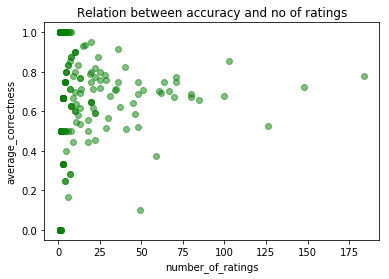

In [25]:
plot(rater_goodness['number_of_ratings'],rater_goodness['avg_correctness'],color= 'green', linestyle = 'none', alpha=0.5, marker= 'o')
xlabel('number_of_ratings')
ylabel('average_correctness')
title('Relation between accuracy and no of ratings')
show()

# We can see that there is higher accuracy among turks with fewer ratings.In addition to that, accuracy 
# does not go down with increase in ratings as expected earlier
# Also, there is no visible linear relationship hence pearson correlation might not work

## Q7 Overall predicted odds

In [26]:
# Identifying the turks who are better than 75 percentile and 25 percentile from the gold set
sel_turks_75 = rater_goodness[rater_goodness['number_of_ratings'] > rater_goodness['number_of_ratings'].quantile(0.75)]
sel_turks_25 = rater_goodness[rater_goodness['number_of_ratings'] > rater_goodness['number_of_ratings'].quantile(0.25)]

In [27]:
# Calculating the overall predicted odds for each url,category pair
temp_75 = labels_unknown[labels_unknown['turk'].isin(sel_turks_75.index)]
temp1_75 = temp_75.merge(rater_goodness,on = ['turk'])
overall_odds_75 = temp1_75.groupby(['url','category'])['odds'].prod().unstack()
overall_odds_75.T

url,http://0-101.net,http://000.cc,http://0000.jp,http://000relationships.com,http://000vitamins.com,http://000webhost.com,http://003my.com,http://007absolutehardcore.com/early_cumshots/index.html,http://007swz.cn,http://01768.com,...,http://zucaiba.com,http://zumin-ads.com,http://zune.net,http://zvezdanews.ru,http://zwame.pt,http://zwinky.com,http://zylom.com,http://zynga.com,http://zz868.com,http://zzx.cc
category,,,,,,,,,,,,,,,,,,,,,
G,2.297602,1.485456,14.339248,3.841962,4.033641,11.892639,4.861524,NaN,1.485456,1.485456,...,1.367113,2.750845,20.002004,4.45842,8.535103,17.201875,1.849543,3.666513,1.047852,1.417620
P,NaN,NaN,NaN,1.851852,NaN,NaN,NaN,3.346522,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.851852,NaN
R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.290450,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.252871,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.620746


## Q8 Predicted categories

In [28]:
result_75 = pd.DataFrame({'top_odds' : overall_odds_75.T.max().values,'top_category' : overall_odds_75.T.idxmax().values},
             index = overall_odds_75.T.idxmax().index)
result_75

,top_category,top_odds
url,,
http://0-101.net,G,2.297602
http://000.cc,G,1.485456
http://0000.jp,G,14.339248
http://000relationships.com,G,3.841962
http://000vitamins.com,G,4.033641
http://000webhost.com,G,11.892639
http://003my.com,G,4.861524
http://007absolutehardcore.com/early_cumshots/index.html,X,293.252871
http://007swz.cn,G,1.485456


## Q9 Predicted categories using more turks

In [31]:
# Calculating the overall odds and the predicted categories at 25% confidence

temp_25 = labels_unknown[labels_unknown['turk'].isin(sel_turks_25.index)]
temp1_25 = temp_25.merge(rater_goodness,on = ['turk'])

overall_odds_25 = temp1_25.groupby(['url','category'])['odds'].prod().unstack()
result_25 = pd.DataFrame({'top_odds' : overall_odds_25.T.max().values,'top_category' : overall_odds_25.T.idxmax().values},
             index = overall_odds_25.T.idxmax().index)

In [32]:
temp2 = result_75.merge(result_25,on = 'url',suffixes = ['_75','_25'])
temp3 = temp2[['top_category_75','top_category_25']].reset_index()
pd.crosstab(temp3['top_category_75'],temp3['top_category_25'])

top_category_25,G,P,R,X
top_category_75,,,,
G,8280,586,180,214
P,196,352,52,25
R,22,34,127,25
X,28,5,28,456


#### Most errors are present for the (G,P) combination as the turks from 25% confidence buckets selected 586 categories as P which were classified as G by the turks from 75% confidence bucket